In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import model, analysis
from common import util, constants, rh_neutrino, cosmology

In [2]:
4 * 2 / np.pi**2 *  3 / (32*np.pi)

0.02418865082489962

In [16]:
m_a_s, Gamma_phi_s, _, eta_B_numerical = util.load_data("paper_eta_B.pkl")

In [4]:
f_a = 3e14
H_inf = 2e10

N_f = 3
Gamma_prefactor = 9*(171 + 65*N_f - 6*N_f**2) / (45 + 73*N_f - 3*N_f**2)
mu_eff_prefactor = 4/3 * (36 + 65*N_f - 6*N_f**2) / (171 + 65*N_f - 6*N_f**2)

In [5]:
Gamma_prefactor

11.848101265822784

In [6]:
mu_eff_prefactor

0.7564102564102564

In [7]:
m_ba_sq = 2.4e-3 * (1e-9)**2
v_EW = 174 
4*2/np.pi**2 * 3 / (32*np.pi) * m_ba_sq / v_EW**4

6.333239239268153e-32

In [8]:
Gamma_prefactor * 0.002 # paper: O(0.001) if its 0.002 then the values are approx. the same 

0.023696202531645567

In [9]:
4*2/np.pi**2 * 3 / (32*np.pi)

0.02418865082489962

In [10]:
M_star = 1e15
Gamma_prefactor * 0.0001 / M_star**2

1.1848101265822784e-33

In [11]:
m_ba_sq / v_EW**4, 1 / M_star**2

(2.6182689084703983e-30, 9.999999999999999e-31)

In [13]:
%%time
m_a_s_correct, Gamma_phi_s_correct, eta_B_numerical_correct = analysis.sample_parameter_space_numerical(f_a, H_inf, kwargs=dict(
    bg_kwargs=dict(#sigma_eff=Gamma_prefactor*rh_neutrino.paper_sigma_eff, 
                   mu_eff_prefactor=mu_eff_prefactor, 
    )))

/home/jana/Documents/master-project/axion_leptogenesis/model.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


CPU times: user 3min 10s, sys: 15.9 ms, total: 3min 10s
Wall time: 3min 10s


In [14]:
fname = "eta_B_corrected.pkl"
util.save_data(fname, m_a_s_correct, Gamma_phi_s_correct, eta_B_numerical_correct)
#m_a_s_correct, Gamma_phi_s_correct, eta_B_numerical_correct = util.load_data(fname)

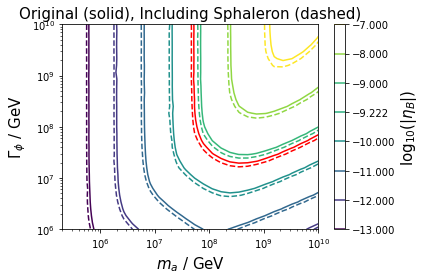

In [17]:
levels = np.sort(np.concatenate([np.arange(-13, -7 + 1), [np.log10(model.eta_B_observed)]]))
CS = plt.contour(m_a_s, Gamma_phi_s, np.log10(np.abs(eta_B_numerical)), levels)
cbar = plt.colorbar()
cbar.set_label("$\log_{10}(|\eta_B|)$", fontsize=15)
CS.collections[np.where(CS.levels == np.log10(model.eta_B_observed))[0][0]].set_color("red")

CS2 = plt.contour(m_a_s_correct, Gamma_phi_s_correct, np.log10(np.abs(eta_B_numerical_correct)), levels, linestyles="--")
CS2.collections[np.where(CS2.levels == np.log10(model.eta_B_observed))[0][0]].set_color("red")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$m_a$ / GeV", fontsize=15)
plt.ylabel(r"$\Gamma_\phi$ / GeV", fontsize=15)
plt.title("Original (solid), Including Sphaleron (dashed)", fontsize=15)
plt.tight_layout()
